# Chargement des données

In [1]:
import pandas as pd

#chargement du data set depuis source en ligne
url = "netflix_titles.csv"
df = pd.read_csv(url)

#afficher les 5 premières lignes
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Exploration des données

In [2]:
# 1. Combien de lignes et de colonnes avons-nous
print(f"Dimensions du tableau : {df.shape}")

# 2. Quelles colonnes ont des données manquantes (valeurs nulles)
print("\nDonnées manquantes par colonne : ")
print(df.isnull().sum())

# 3. Répartitions Films vs Séries
print("\nRépartition Films vs Séries : ")
print(df['type'].value_counts())

Dimensions du tableau : (8807, 12)

Données manquantes par colonne : 
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Répartition Films vs Séries : 
type
Movie      6131
TV Show    2676
Name: count, dtype: int64


# Visualisation

/tmp/ipython-input-2010277242.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='type', data = df, palette = 'Reds_r')


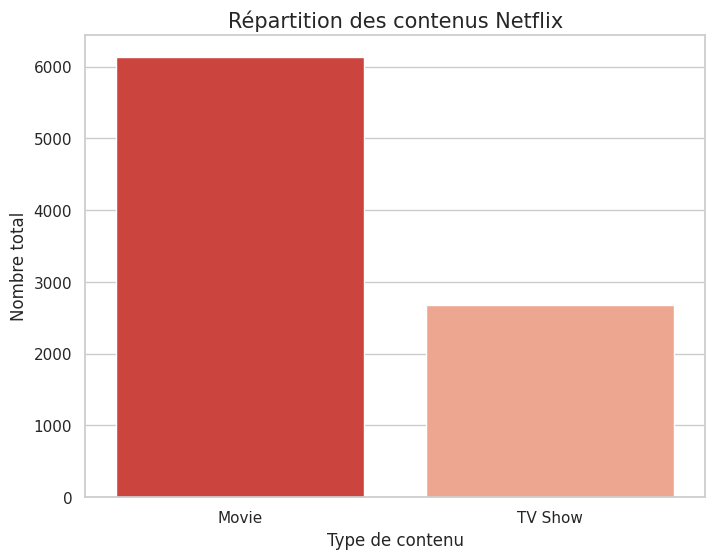

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# On défini le style
sns.set_theme(style="whitegrid")

# Création du graphique
plt.figure(figsize = (8,6))
ax = sns.countplot(x='type', data = df, palette = 'Reds_r')

#Ajout de titres
plt.title('Répartition des contenus Netflix', fontsize = 15)
plt.xlabel('Type de contenu')
plt.ylabel('Nombre total')

plt.show()


# Evolution dans le temps

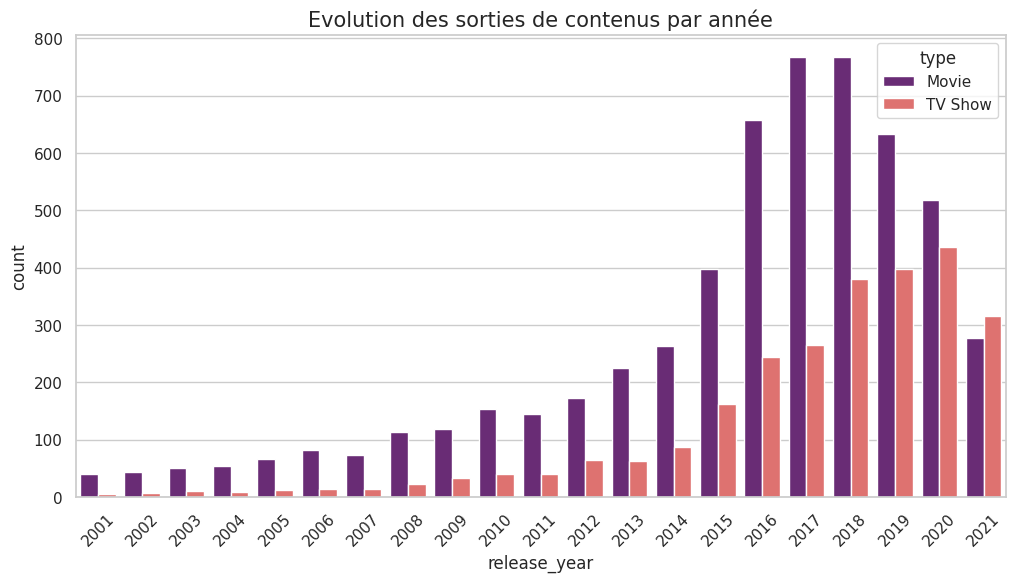

In [4]:
# On filtre pour ne garder que les 15 dernières années
recent_years = df[df['release_year'] > 2000]

plt.figure(figsize = (12,6))
sns.countplot(x = 'release_year', data = recent_years, hue='type', palette = 'magma')
plt.title("Evolution des sorties de contenus par année", fontsize = 15)
plt.xticks(rotation = 45)
plt.show()

# Analyse de la durée des films

In [5]:
# 1. On filtre les films ET on s'assure qu'il n'y a pas de valeurs manquantes dans 'duration'
movies_only = df[(df['type'] == 'Movie') & (df['duration'].notnull())].copy()

# 2. Nettoyage de la colonne
# On enlève ' min', on convertit en float d'abord (plus robuste), puis en int
movies_only['duration_num'] = movies_only['duration'].str.replace(' min', '').astype(float).astype(int)

# 3. Affichage des stats pour vérifier que ça a marché
print("Statistiques sur la durée des films (après nettoyage) :")
print(movies_only['duration_num'].describe())

Statistiques sur la durée des films (après nettoyage) :
count    6128.000000
mean       99.577187
std        28.290593
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration_num, dtype: float64


Visualisation de la distrubution

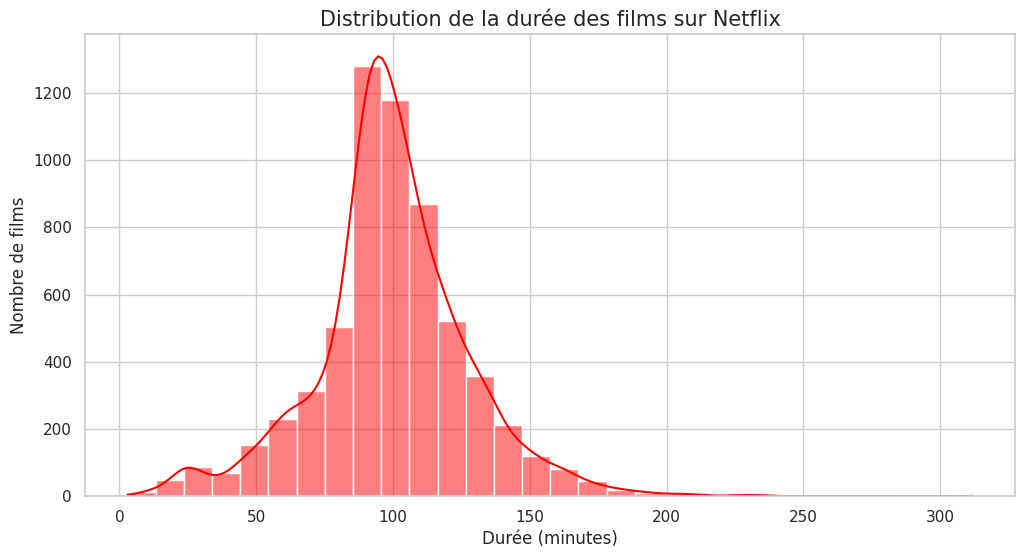

In [6]:
plt.figure(figsize = (12,6))
sns.histplot(movies_only['duration_num'], bins = 30, kde = True, color = 'red')

plt.title('Distribution de la durée des films sur Netflix', fontsize=15)
plt.xlabel('Durée (minutes)')
plt.ylabel('Nombre de films')
plt.show()

# Analyse des Genres

/tmp/ipython-input-2210349463.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_genres.values, y = top_genres.index, palette='magma')


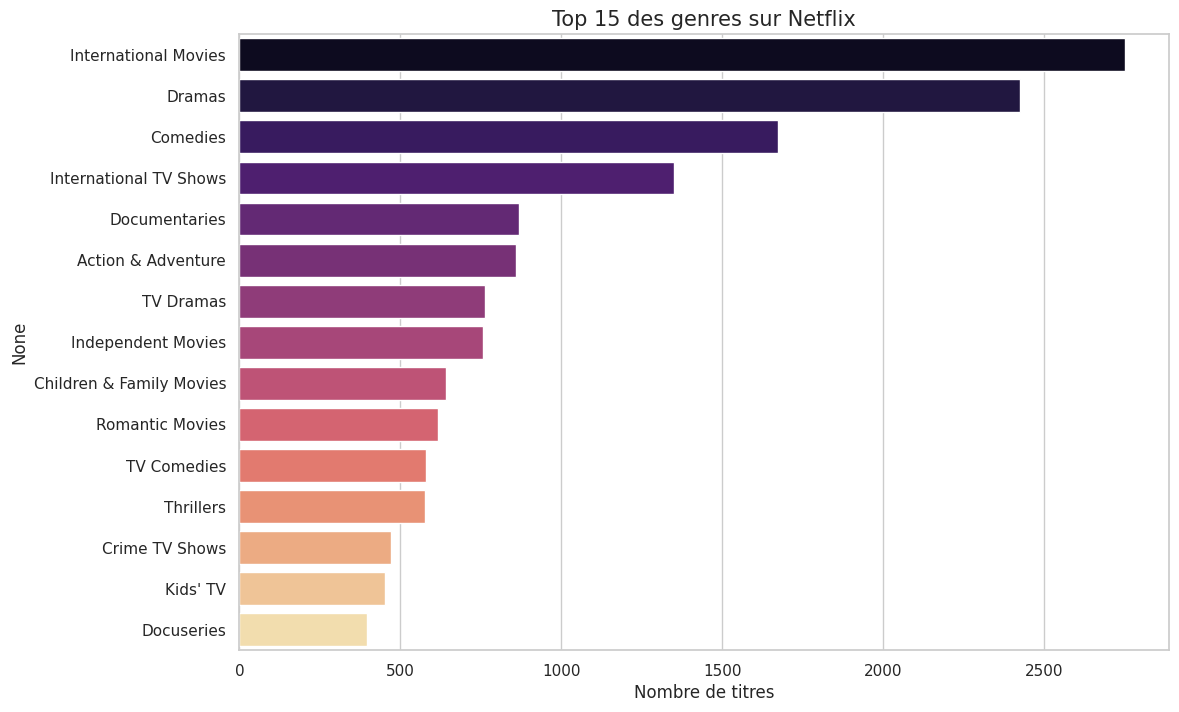

In [7]:
# 1. On récupère les genres, on sépare par la virgule et on nettoie les espaces
genre_series = df['listed_in'].str.split(', ')

# 2. On crée une liste géante avec tous les genres individuels
all_genres = []
for liste in genre_series.dropna():
  all_genres.extend(liste)

# 3. On compte les occurrences et on prend le Top 15
top_genres = pd.Series(all_genres).value_counts().head(15)

# 4. Visualisation
plt.figure(figsize = (12,8))
sns.barplot(x = top_genres.values, y = top_genres.index, palette='magma')
plt.title('Top 15 des genres sur Netflix', fontsize=15)
plt.xlabel('Nombre de titres')
plt.show()

# Introduction à la Data Science (Le Modèle)

Pour finir ce projet, on va faire un petit saut dans le futur. On ne veut plus seulement décrire les données, on veut que l'ordinateur apprenne à les reconnaître.

Le concept : On va donner à une IA la "Durée" et le "Genre" d'un programme, et elle devra deviner s'il s'agit d'un Film ou d'une Série.



# Préparation des données pour le machine learning

In [ ]:
# 1. On crée un tableau propre avec uniquement le type et la durée
ml_data = df[['type', 'duration']].dropna().copy()

## 2. On simplifie la durée : on ne garde que le premier nombre
# (Ex: "90 min" devient 90, "2 Seasons" devient 2
ml_data['duration_val'] = ml_data['duration'].str.split(' ').str[0].astype(int)

# 3. On transforme la cible (ce qu'on veut prédire) en chiffre
# Movie = 0, TV Show = 1
ml_data['type_label'] = ml_data['type'].map({'Movie' : 0, 'TV Show' : 1})

print("Données prêtes pour l'IA")
print(ml_data[['duration_val', 'type_label']].head())


Données prêtes pour l'IA
   duration_val  type_label
0            90           0
1             2           1
2             1           1
3             1           1
4             2           1


# Entraîner l'IA (L'Arbre de Décision)

In [9]:
from os import X_OK
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# 1. On définit nos variables
X = ml_data[['duration_val']]# L'IA regarde le nombre (ex: 90 ou 2)
y = ml_data['type_label']     # L'IA doit deviner si c'est 0 (Film) ou 1 (Série)

# 2. On divise le dataset en deux groupes
# train : 80% pour s'entraîner / test : 20% pour vérifier si elle a compris
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# 3. On choisit notre algorithme : l'Arbre de Décision
model = DecisionTreeClassifier()

# 4. L'ENTRAÎNEMENT (Le moment où l'IA apprend les règles)
model.fit(X_train, y_train)

# 5. On vérifie la précision
score = model.score(X_test, y_test)
print(f"Précision de mon IA : {score * 100:.2f}%")

Précision de mon IA : 99.89%


In [11]:
#fonction pour tester l'ia avec des données qu'on entre
def deviner_type(duree_chiffre):
    prediction = model.predict([[duree_chiffre]])
    if prediction[0] == 0:
        return "C'est un FILM 🎬"
    else:
        return "C'est une SÉRIE 📺"

# Tests
print(f"Pour 95 (min) : {deviner_type(11)}")
print(f"Pour 2 (Saisons) : {deviner_type(2)}")

Pour 95 (min) : C'est un FILM 🎬
Pour 2 (Saisons) : C'est une SÉRIE 📺


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


/tmp/ipython-input-644855170.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, ax=axes[1, 0], palette='Reds_r')


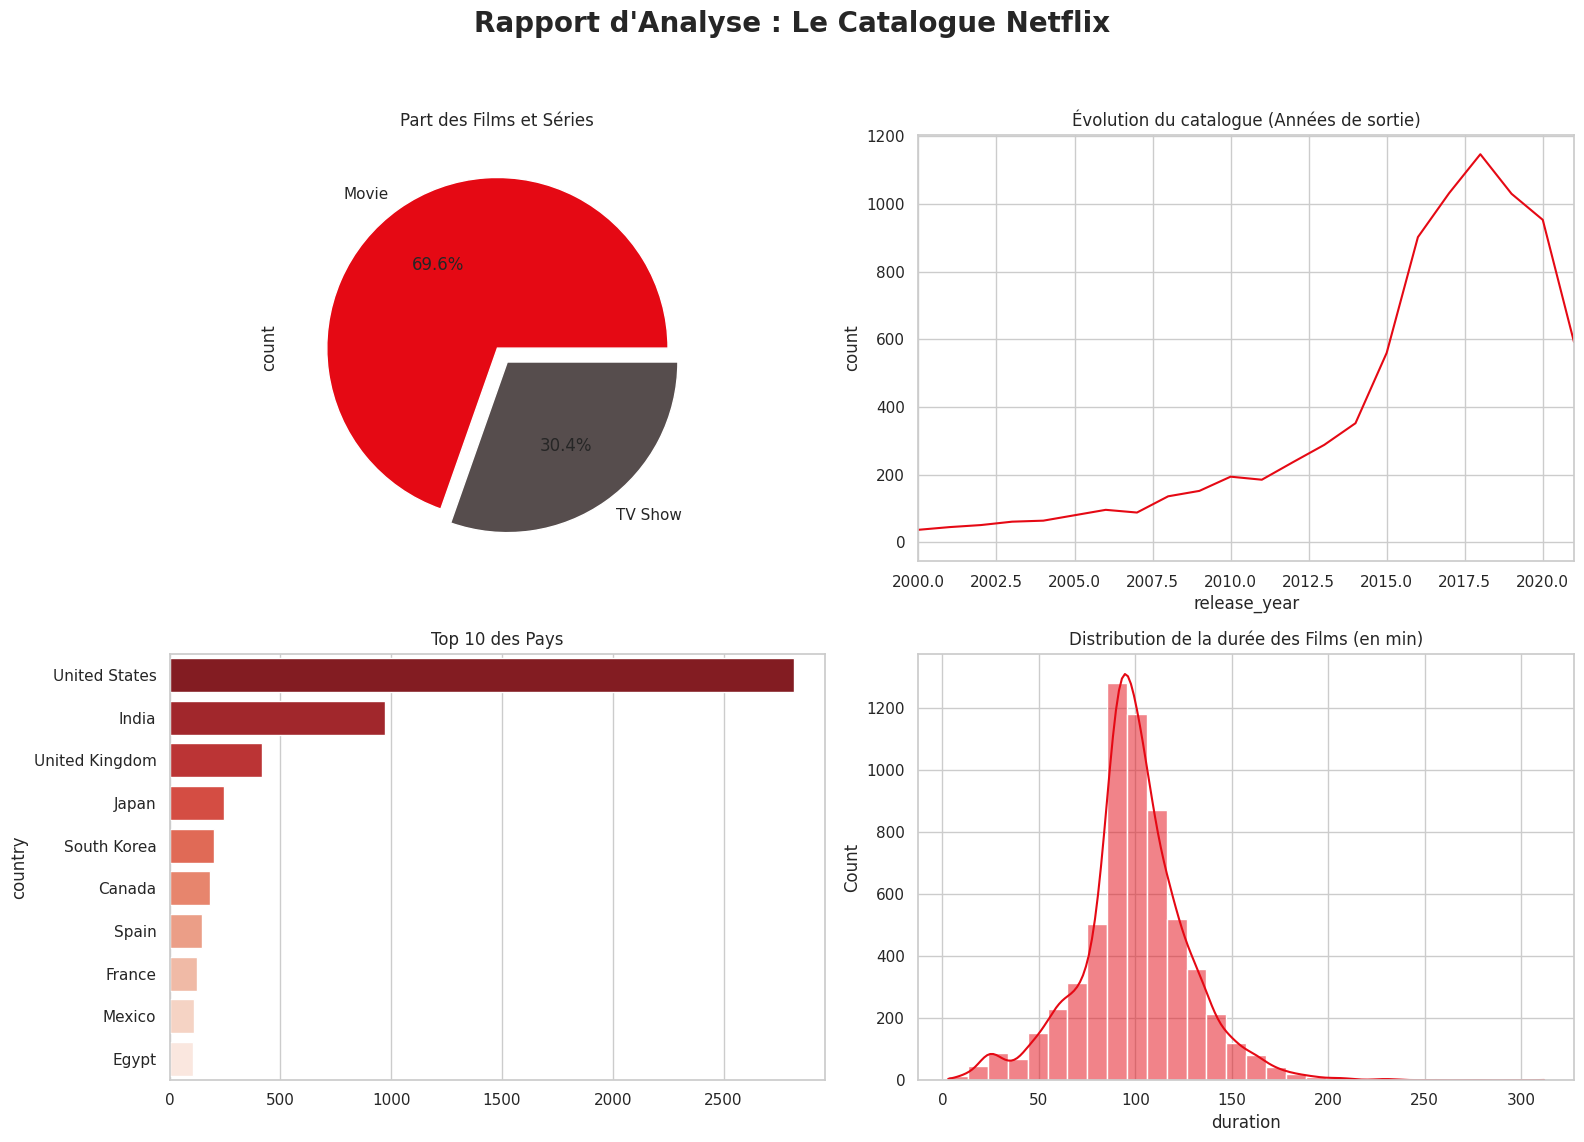

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Création de la zone de dessin (2 lignes, 2 colonnes)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Rapport d\'Analyse : Le Catalogue Netflix', fontsize=20, fontweight='bold')

# Graphique 1 : La répartition Films vs Séries
df['type'].value_counts().plot.pie(ax=axes[0, 0], autopct='%1.1f%%', colors=['#e50914', '#564d4d'], explode=[0, 0.1])
axes[0, 0].set_title('Part des Films et Séries')

# Graphique 2 : Évolution des ajouts par année
sns.lineplot(data=df['release_year'].value_counts().sort_index(), ax=axes[0, 1], color='#e50914')
axes[0, 1].set_title('Évolution du catalogue (Années de sortie)')
axes[0, 1].set_xlim(2000, 2021) # On zoome sur les années récentes

# Graphique 3 : Top 10 des pays producteurs
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, ax=axes[1, 0], palette='Reds_r')
axes[1, 0].set_title('Top 10 des Pays')

# Graphique 4 : Distribution des durées (Films)
movies_duration = df[df['type'] == 'Movie']['duration'].str.replace(' min', '').astype(float)
sns.histplot(movies_duration, bins=30, ax=axes[1, 1], color='#e50914', kde=True)
axes[1, 1].set_title('Distribution de la durée des Films (en min)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()